In [1]:
from fastai import *
from fastai.vision import *

In [2]:
import os
import pathlib
import numpy as np

In [3]:
# Set current directory to the directory of the project
os.chdir(os.getcwd())

In [4]:
# Make sure model is using GPU
torch.cuda.set_device(0)
print(torch.cuda.get_device_name(0))
torch.cuda.is_available()

GeForce GTX 1050 Ti


True

In [11]:
os.listdir()

['.ipynb_checkpoints',
 'Data_Files',
 'dbconn.py',
 'exampledb.db',
 'export.pkl',
 'main.py',
 'models',
 'model_building.ipynb',
 'mrlEyes_2018_01',
 'python',
 'requirements.txt',
 'server_communication.py',
 'server_initialization.py',
 'test.py',
 'tracker.py',
 'user.py',
 'user_interface.py',
 '__pycache__']

In [6]:
# Get a list of every image in the dataset
curPath = pathlib.Path("./mrlEyes_2018_01")
fol_names = [name for name in curPath.iterdir() if name.is_dir()]
fil_names = list()

for i in fol_names:
    for j in i.iterdir():
        fil_names.append(j)
        
fil_names[1].stem[-8]

'0'

In [7]:
def get_labels(file_path):
    return "Open" if file_path.stem[-8] == '1' else "Closed"

In [8]:
# Sort images by state (Open or Closed)
np.random.seed(42)
data = ImageDataBunch.from_name_func(".", fil_names, get_labels, size=224).normalize(imagenet_stats)

In [9]:
data

ImageDataBunch;

Train: LabelList (67919 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Closed,Closed,Closed,Closed,Closed
Path: .;

Valid: LabelList (16979 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Open,Closed,Open,Closed,Open
Path: .;

Test: None

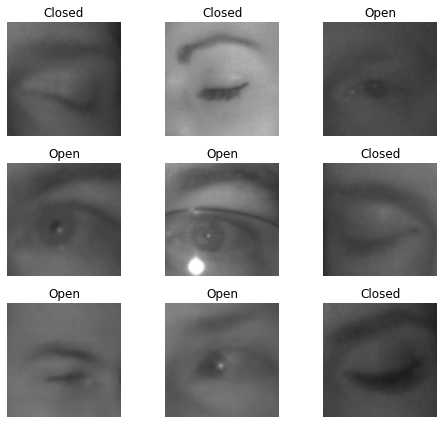

In [10]:
# Show sample from data
data.show_batch(rows=3, figsize=(7,6))

In [10]:
# Using resnet34 as I don't believe I need more than that to create a ~99% accurate model.
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.090085,0.063533,0.022793,11:08
1,0.051047,0.037134,0.014253,10:23
2,0.036280,0.031980,0.011073,10:26
3,0.031545,0.029631,0.010660,10:25


In [12]:
# Save the model in case I want to improve upon it later.
learn.save("stage-1")

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

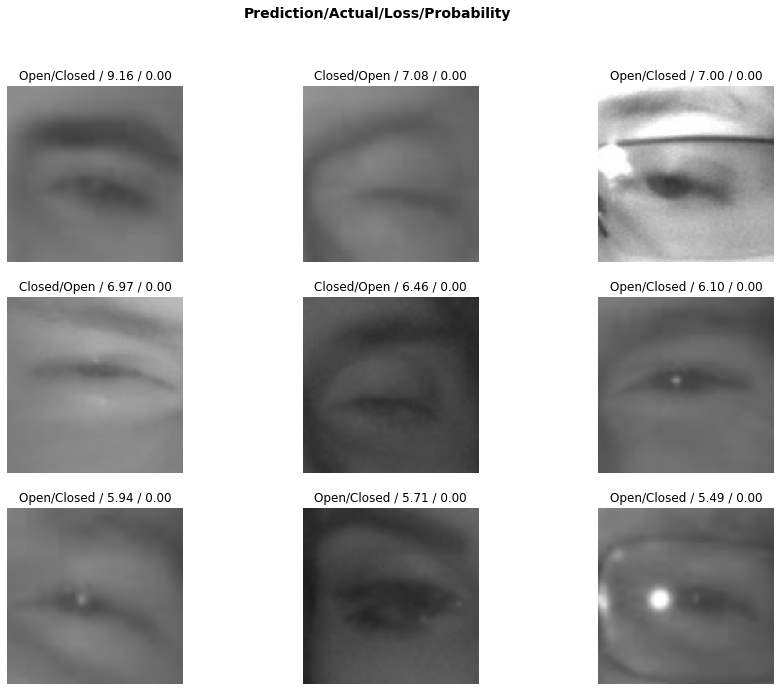

In [25]:
# See which pictures model had most trouble on
interp.plot_top_losses(9, figsize=(15,11))

Interestingly enough, it seems like the model is even better than the data because I seem to agree more with the model than what the data says. I do, however, need to explore whether or not these descrepencies are from my labeling or the original dataset.

In [16]:
# Export model to directory
learn.export()

In [19]:
# Test to see if model loads properly
new_learn = load_learner(".")